# Customer Satisfaction Prediction Project

## Author: Soumedhik Bharati

### Overview
This project involves predicting customer satisfaction using various machine learning models, including Artificial Neural Network (ANN), Decision Tree Classifier (DTC), Gradient Boosting (GB), and Extreme Gradient Boosting (XGBoost).


# <span style="font-size: x-large;">USING ANN TO DO BINARY CLASSIFICATION:-</span>


In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv('C:/Users/sumit/OneDrive/Documents/Models/Airplane/test.csv')
train = pd.read_csv('C:/Users/sumit/OneDrive/Documents/Models/Airplane/train.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Gender']= le.fit_transform(train['Gender']) 
train['Customer Type']= le.fit_transform(train['Customer Type']) 
train['Type of Travel']= le.fit_transform(train['Type of Travel']) 
train['Class']= le.fit_transform(train['Class']) 
train['satisfaction']= le.fit_transform(train['satisfaction'])

In [4]:
le1 = LabelEncoder()
test['Gender']= le1.fit_transform(test['Gender']) 
test['Customer Type']= le1.fit_transform(test['Customer Type']) 
test['Type of Travel']= le1.fit_transform(test['Type of Travel']) 
test['Class']= le1.fit_transform(test['Class']) 
test['satisfaction']= le1.fit_transform(test['satisfaction'])
test = test.interpolate(method='linear') 
X_test = test.drop(['satisfaction', 'Unnamed: 0', 'id'], axis=1).to_numpy()

In [34]:
test = test.interpolate(method='linear')
X_test = test.drop(['satisfaction', 'Unnamed: 0', 'id'], axis=1).to_numpy()
train = train.interpolate(method='linear')
X_train = train.drop(['satisfaction', 'Unnamed: 0', 'id'], axis=1).to_numpy()

In [35]:
Y_train = train.iloc[:, -1].to_numpy()

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.01)))

In [38]:
callback = EarlyStopping(
    monitor='val_accuracy',  # Change to 'val_accuracy'
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [45]:
learning_rate = 0.0001
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])

In [46]:
history = model.fit(X_train, Y_train, epochs=25, validation_split=0.2, verbose=1, callbacks=[callback])

Epoch 1/25
2598/2598 [==============================] - 6s 2ms/step - loss: 0.2415 - accuracy: 0.9296 - val_loss: 0.1798 - val_accuracy: 0.9540
Epoch 2/25
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2299 - accuracy: 0.9338 - val_loss: 0.1748 - val_accuracy: 0.9539
Epoch 3/25
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2271 - accuracy: 0.9342 - val_loss: 0.1723 - val_accuracy: 0.9545
Epoch 4/25
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2233 - accuracy: 0.9349 - val_loss: 0.1700 - val_accuracy: 0.9547
Epoch 5/25
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2229 - accuracy: 0.9342 - val_loss: 0.1690 - val_accuracy: 0.9549
Epoch 6/25
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2227 - accuracy: 0.9343 - val_loss: 0.1671 - val_accuracy: 0.9554
Epoch 7/25
2598/2598 [==============================] - 5s 2ms/step - loss: 0.2235 - accuracy: 0.9335 - val_loss: 0.1684 - val_accuracy:

In [51]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [52]:
Y_test = test.iloc[:, -1].to_numpy()

In [53]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

Accuracy: 0.9528410840776101
Precision: 0.9736597170513775
Recall: 0.9173901604840832
AUC: 0.948985343056836


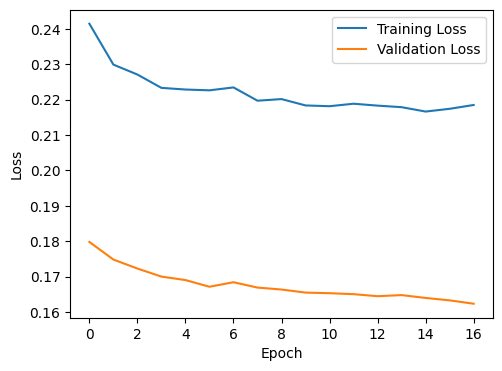

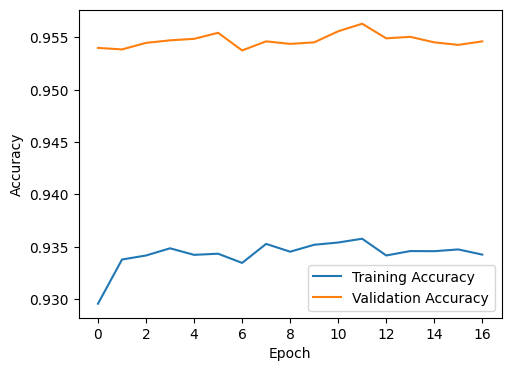

In [54]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()


# <span style="font-size: x-large;">USING DECISION TREE CLASSIFIER TO DO BINARY CLASSIFICATION:</span>


In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5, min_samples_split=5, splitter='best', random_state=None, max_features=None, class_weight=None) #This creates an object of the DecisionTreeClassifier() class for passing the values of X and Y for model training
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=5)

In [63]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, y_pred))

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Absolute Error: 0.04692793347705575
Mean Squared Error: 0.04692793347705575


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[14091   482]
 [  737 10666]]


In [66]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred, average='weighted') 
print(f1)

0.9530102500418476


In [67]:
from sklearn.metrics import accuracy_score
print (accuracy_score(Y_test, y_pred))

0.9530720665229443


[Text(0.48564918369333254, 0.96875, 'x[11] <= 0.185\nentropy = 0.987\nsamples = 103904\nvalue = [58879, 45025]'),
 Text(0.18915505320682893, 0.90625, 'x[6] <= 0.58\nentropy = 0.607\nsamples = 52429\nvalue = [44627, 7802]'),
 Text(0.0683821302918445, 0.84375, 'x[6] <= -1.679\nentropy = 0.467\nsamples = 47700\nvalue = [42957, 4743]'),
 Text(0.051350357596031834, 0.78125, 'x[13] <= -2.144\nentropy = 0.042\nsamples = 1768\nvalue = [8, 1760]'),
 Text(0.05042752912677356, 0.71875, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.05227318606529011, 0.71875, 'entropy = 0.0\nsamples = 1760\nvalue = [0, 1760]'),
 Text(0.08541390298765716, 0.78125, 'x[4] <= -0.152\nentropy = 0.347\nsamples = 45932\nvalue = [42949, 2983]'),
 Text(0.05411884300380667, 0.71875, 'x[13] <= 0.106\nentropy = 0.699\nsamples = 12896\nvalue = [10462, 2434]'),
 Text(0.032911812204406504, 0.65625, 'x[9] <= 0.409\nentropy = 0.378\nsamples = 9038\nvalue = [8376, 662]'),
 Text(0.021989272119044872, 0.59375, 'x[13] <= -1.3

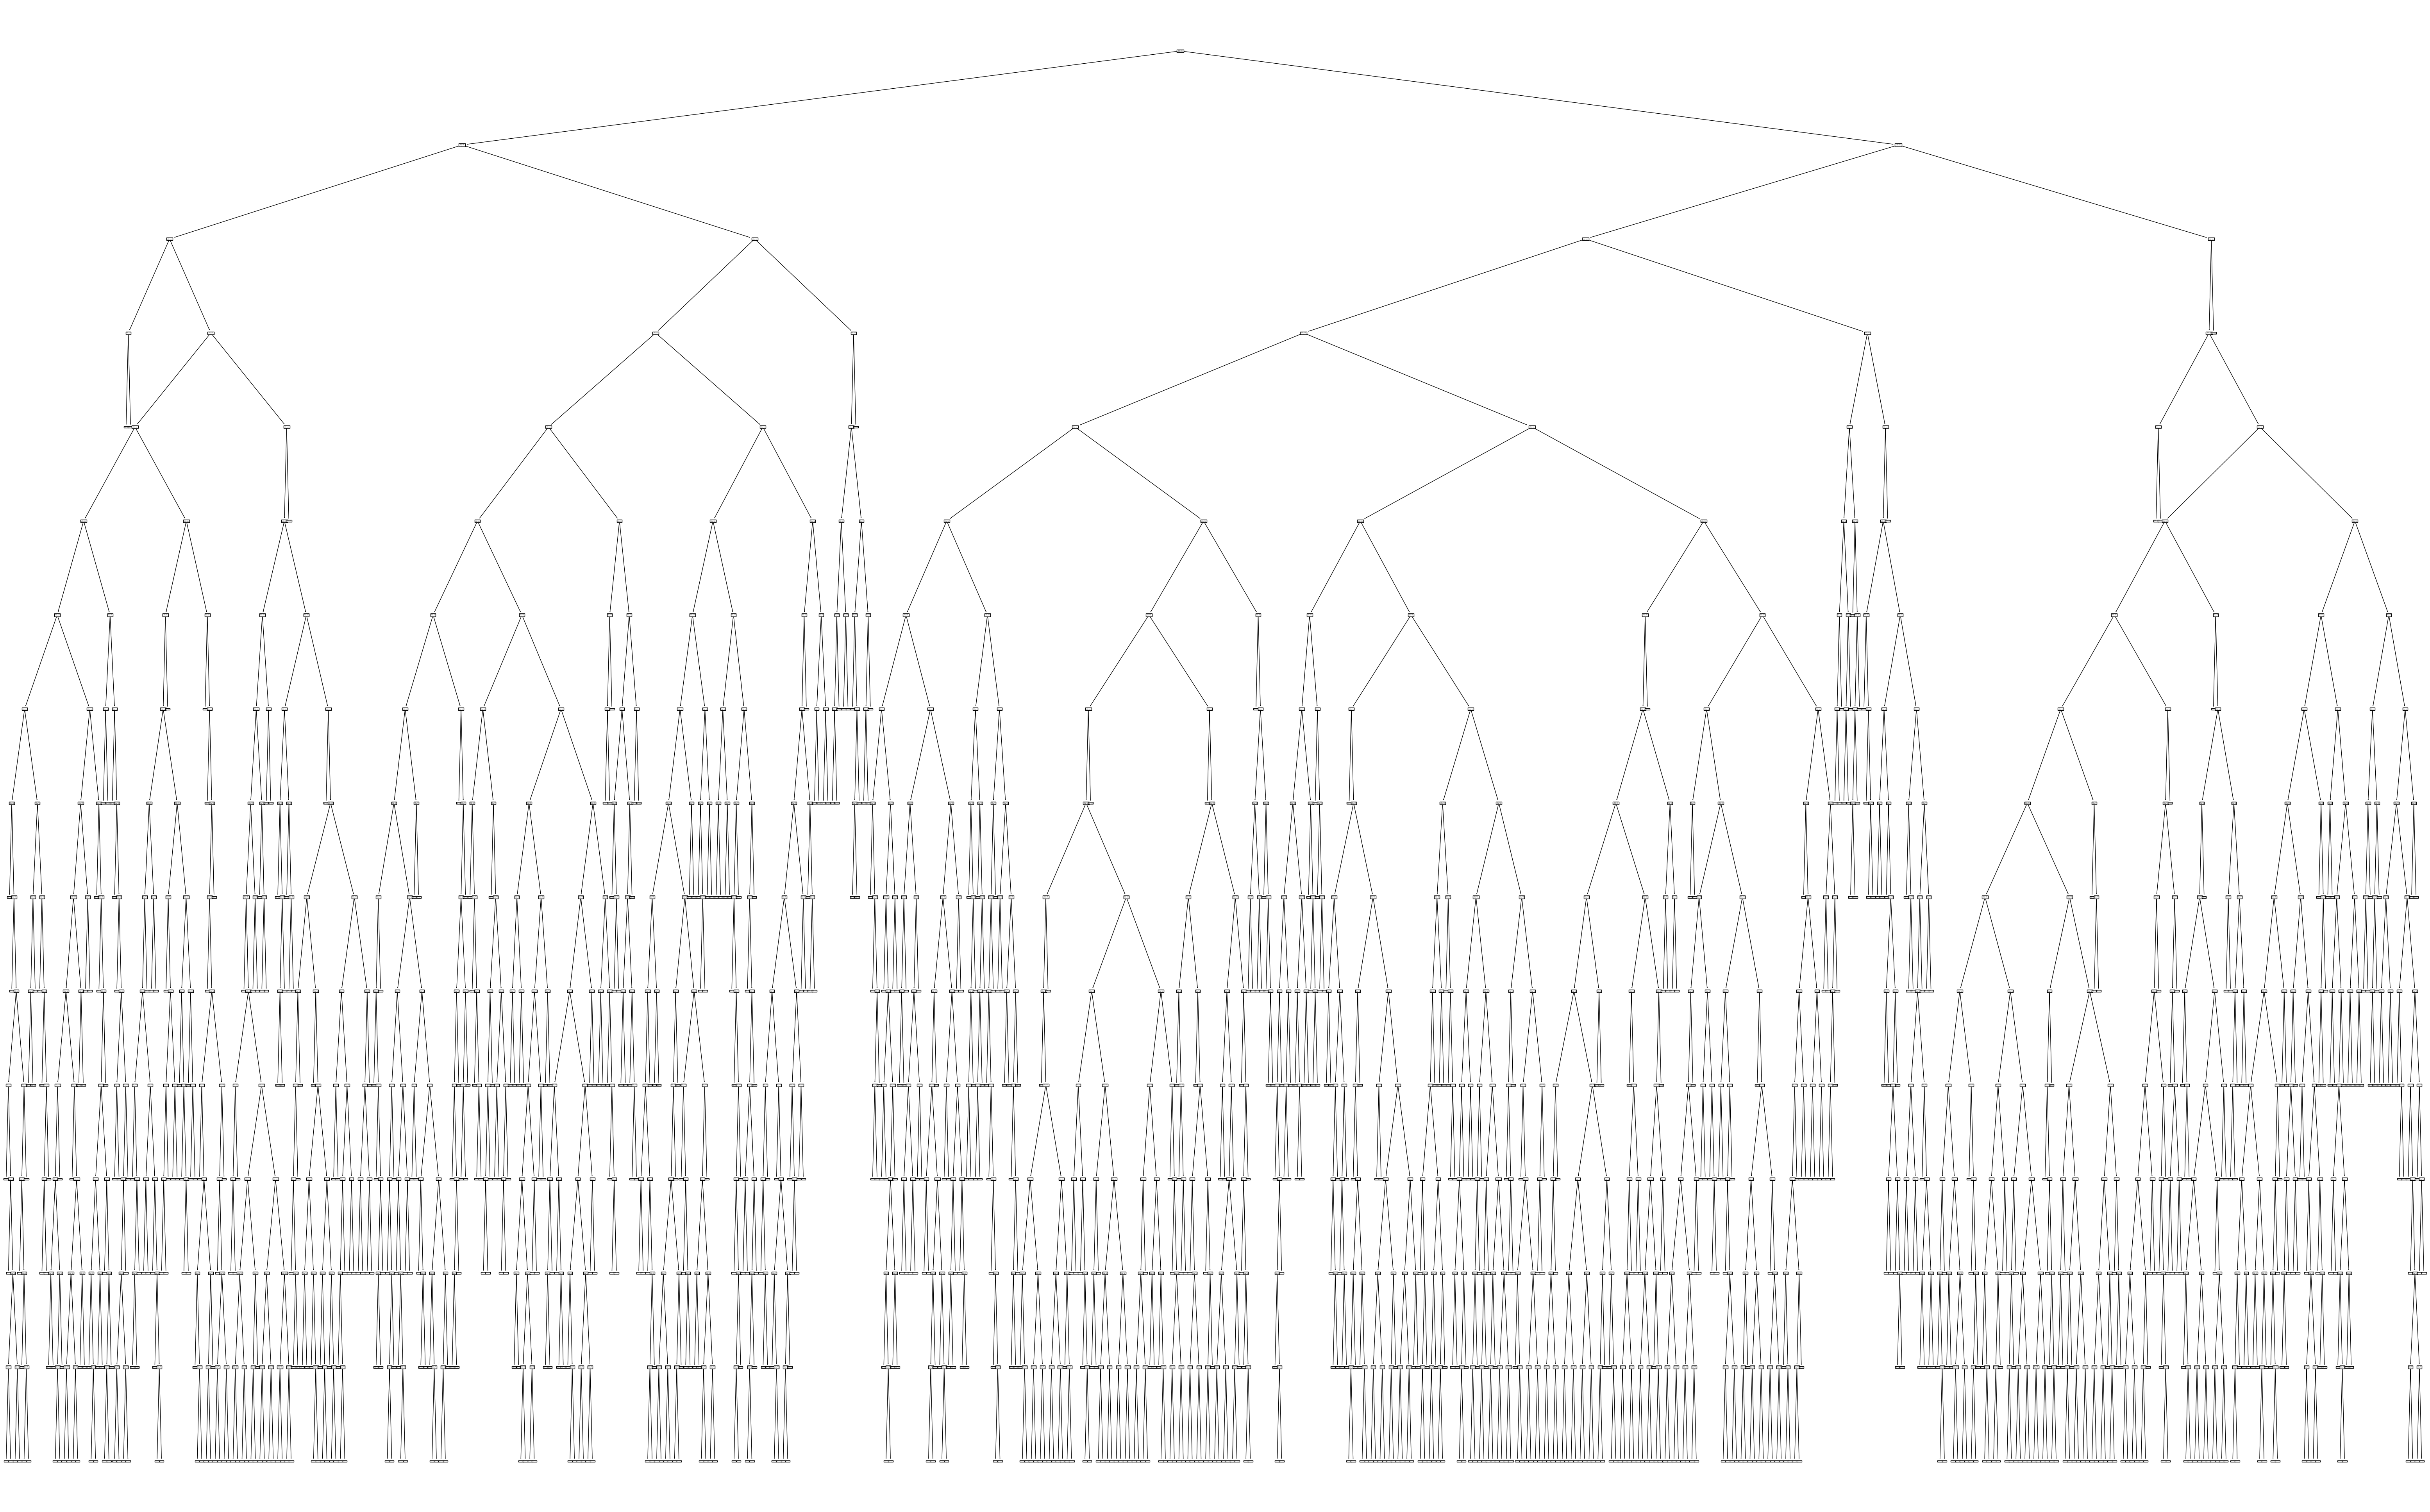

In [68]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(model)

# <span style="font-size: x-large;">ENSEMBLE LEARNING TECHNIQUES:-</span>


# <span style="font-size: x-large;">USING ADAPTIVE GRADIENT BOOSTING TO DO BINARY CLASSIFICATION:</span>


In [91]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [92]:
clf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [93]:
y_pred = clf.predict(X_test)

In [94]:
accuracy = clf.score(X_test, Y_test)
accuracy

0.9290113951339698

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=0), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, Y_test)
print("Best Model Accuracy:", accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best Model Accuracy: 0.9254311672312904


In [106]:
best_clf = AdaBoostClassifier(**best_params)
best_clf.fit(X_train, Y_train)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, Y_test)
accuracy

0.9262781028641823

# <span style="font-size: x-large;">USING EXTREME GRADIENT BOOSTING TO DO BINARY CLASSIFICATION:</span>


In [104]:
import xgboost as xgb
XGB = xgb.XGBClassifier(
    objective='binary:logistic',      
    max_depth=15,       
    learning_rate=0.01,
    n_estimators=100
)

In [105]:
XGB.fit(X_train, Y_train)
predictions = XGB.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9596550662149677


# Model Evaluation

## Accuracies

Here are the accuracies achieved by different models:

| Model         | Accuracy |
| ------------- | -------- |
| ANN           | 0.9528   |
| Decision Tree | 0.9531   |
| AdaBoost      | 0.9263   |
| XGBoost       | 0.9597   |

## Conclusion

In this analysis, XGBoost performed the best with an accuracy of 0.9597.
